In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [3]:
url= "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv"
pumpkins = pd.read_csv(url)

pumpkins.head()
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [11]:
month = pd.DatetimeIndex(pumpkins['Date']).month

new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'],'Variety': pumpkins["Variety"] })
price = (new_pumpkins["Low Price"] + new_pumpkins["High Price"] ) / 2
new_pumpkins["Price"] = price
new_pumpkins.dropna(inplace = True)
new_pumpkins.head()

,Month,Package,Low Price,High Price,Variety,Price
2,9,24 inch bins,160.0,160.0,HOWDEN TYPE,160.0
3,9,24 inch bins,160.0,160.0,HOWDEN TYPE,160.0
4,11,24 inch bins,90.0,100.0,HOWDEN TYPE,95.0
5,11,24 inch bins,90.0,100.0,HOWDEN TYPE,95.0
6,9,36 inch bins,160.0,170.0,HOWDEN TYPE,165.0


In [68]:
one_hot_encoded_variety = pd.get_dummies(new_pumpkins["Variety"])

print(one_hot_encoded_variety["PIE TYPE"].corr(new_pumpkins["Price"]).all())

type(one_hot_encoded_variety)

True


pandas.core.frame.DataFrame

In [108]:
X = one_hot_encoded_variety["PIE TYPE"].to_numpy().reshape(-1,1)
X = pd.DataFrame(X, columns = ["PIE TYPE"])


y = new_pumpkins['Price']

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

linear = LinearRegression()
linear.fit(X_train,y_train)

prediction = linear.predict(X_test)


      PIE TYPE
0            0
1            0
2            0
3            0
4            0
...        ...
1747         0
1748         0
1749         0
1750         0
1751         0

[1752 rows x 1 columns]
2       160.00
3       160.00
4        95.00
5        95.00
6       165.00
         ...  
1752     14.75
1753    275.00
1754    275.00
1755    275.00
1756    275.00
Name: Price, Length: 1752, dtype: float64


In [101]:
mse = np.sqrt(mean_squared_error(y_test, prediction))
print(mse)

82.87160695739269


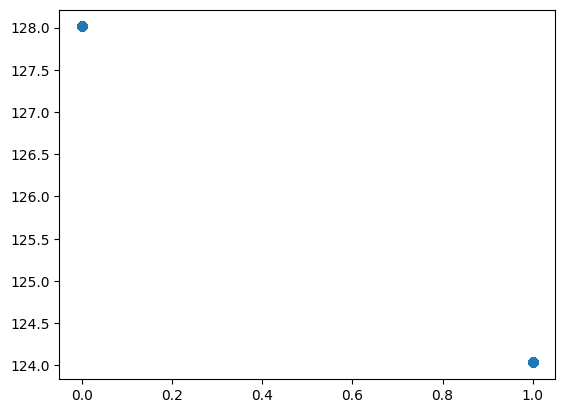

In [109]:
X_test.values.flatten()
plt.scatter(x = X_test, y = prediction)

<BarContainer object of 526 artists>

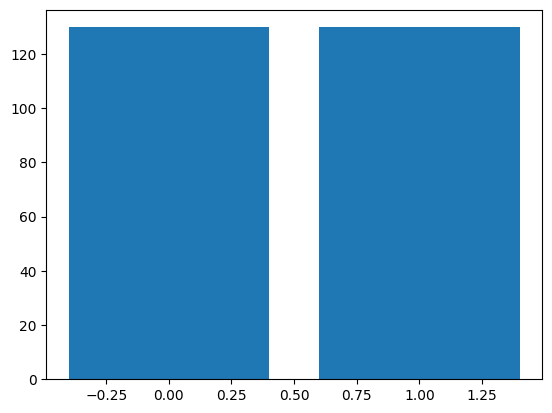

In [106]:
plt.bar(X_test,prediction)

In [121]:
pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test,predictions))
print(mse)
score = pipeline.score(X_train,y_train)
print(score)


84.5839172614796
0.00023504513565852925


In this module, the dataset is interpreted by linear and polynomial regressions moreover, it is represented by the Seaborn library. It is easy to see that, the data we picked is not eligible to fit into any regression model due to its structure. Therefore, the results of the application of the dataset over regression models were not good enough. However, it has still can be illustrated by a chart. At the last of the sheet, it is clear that this data could be easily handled using classification methods.